*In case you are wondering what this little bit of "magic" does: it essentially tells Jupyter notebooks to embed whatever graphic is created by `matplotlib` into the current page. The second line makes that graphic a higher resolution and 2:1 in aspect, which fits better on a page, to my mind, than other aspects, but you can adjust that as you like. I place this at the top of a page so I do it first thing and then get on with the work I want to do. If I am creating nothing graphical, then it's not necessary.*

In [ ]:
%pylab inline
figsize(12, 6)

# 3. Exploring a Text with the NLTK

<!-- ## Table of Contents <a name="toc"></a>

**[Loading a File & Understanding What It Is](#file)**  
**[Tokenizing](#tokenizing)**  
[A Quick Note about Normalization](#norm)  
[Using regex to Tokenize](#REtoke)   
[Using NLTK Tokenizers](#nltktoken)  -->

In the first two notebooks we learned how to load a file, create a word list out of a text string, and then to count words and visualize those counts. In this notebook we will use the `NLTK` to explore how various words occur or are used within a text. Once you have seen how these commands work, feel free to restart the notebook and upload your own text. In the next notebook, we will look at how to load more than one text. 

The first thing we are going to do is load the libraries we know we are going to use, load our text file, and create our word list.

In [28]:
import re
import nltk

waves = open('texts/waves.txt', 'r').read()
waves_words = re.sub("[^a-zA-Z']"," ", waves)
waves_words = re.sub("('\s|\s')"," ", waves_words).lower().split()
#test = re.sub("' "," ", "this z was' a' test")
#print(waves_words)

Once we have our text as our, by now normal, list of words, we need to prepare it for use by the `NLTK` as a text. The command to do this is frighteningly straightforward:

In [29]:
waves_text = nltk.Text(waves_words)

Once we have our text as, well, a text -- but, better, because `nltk.Text`? -- we can do some pretty amazing things, like develop in what linguists call a *key word in context (KWiC)* concordance:

In [35]:
myword = waves_text.concordance('dogs', 'dog')
print(myword)

TypeError: unsupported operand type(s) for -: 'str' and 'int'

We can make this easier to manipulate if we move things around a bit, and then you can try searching for a few words yourself:

In [8]:
# Try any of the following: hunt, hunted, hunter, dark, jungle
myword = "birds'"
print(waves_text.concordance(myword))

Displaying 5 of 5 matches:
ave fallen through the trees ' 'the birds' eyes are bright in the tunnels betw
p against the packed and fluttering birds' wings many feathered folded of the 
to the water's edge became green as birds' feathers softly ruffling their plum
y backed steep hills come down like birds' wings folded there on the short fir
hen the hills close themselves like birds' wings folded i have picked sometime
None


We will examine more ways to understand the relationship between individual words and the text as their context in a moment, but while we have our text as an object and we have a cluster of words in front of us, it might be useful to demonstrate the utility of being able to see where words occur in a text using the NLTK's dispersion plot functon:

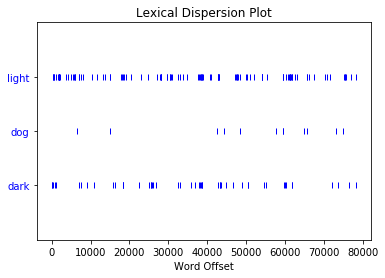

In [10]:
waves_text.dispersion_plot(["light", "dog", "dark"])

If you noticed that what you are doing above is feeding the `dispersion_plot()` function a list of words, you are beginning to get the hang of reading code, which means we can break our list out separately and then simply feed the name of the list to the function:

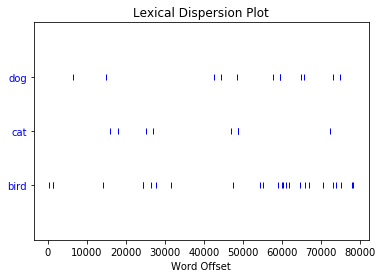

In [12]:
my_list = ["dog", "cat", "bird"]
waves_text.dispersion_plot(my_list)

A lot of the functions for examining words within a text have pretty straightforward names. Let's take a look at a number of them:

In [13]:
myword = "bird"
print(waves_text.similar(myword))

leaf moment line rose sound room table stone little skeleton ditch
stick ship blow school breeze man chair day heap
None


In [15]:
# common_contexts allows you to see where two words are used similarly:
waves_text.common_contexts(["bird", "cat"])

a_or


In [17]:
# Please note that the collocations function uses the NLTK's stopwords list
# in the background. I am not yet sure how to feed it a custom stopword list.
waves_text.collocations()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\clair/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\clair\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [19]:
# This is a pretty straightforward function, but useful if you don't feel
# like consulting your usually much larger word frequency list.
waves_text.count("bird")

26

In [20]:
waves_text.concordance("bird")

Displaying 25 of 26 matches:
eaf transparent and then another one bird chirped high up there was a pause an
ole in the hedge i thought that is a bird on its nest i parted them and looked
ted them and looked but there was no bird on a nest the leaves went on moving 
s are wild my lips tight pressed the bird flies the flower dances but i hear a
d ribbons sprinkle the wallpaper the bird chorus is over only one bird now sin
per the bird chorus is over only one bird now sings close to the bedroom windo
hat i say crowding like a fluttering bird one sentence crosses the empty space
 if it shattered the song of another bird with harsh discord their round eyes 
le experiences so dear to the callow bird with a yellow tuft on its beak now c
descending on the tree tops here one bird taking its way alone made wing for t
or hot muzzle seethed in the water a bird perched on an ash coloured twig sipp
ping over the ploughed land and some bird singing perhaps some intoxicated lar
ems as if no leaf would

Where does "bird" occur within the larger text?